In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Preprocessing of Data

In [2]:
df=pd.read_csv('train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop(['PassengerId','Name','Ticket','Cabin'],inplace=True,axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Dealing with Null Values

In [4]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [5]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [6]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Plots

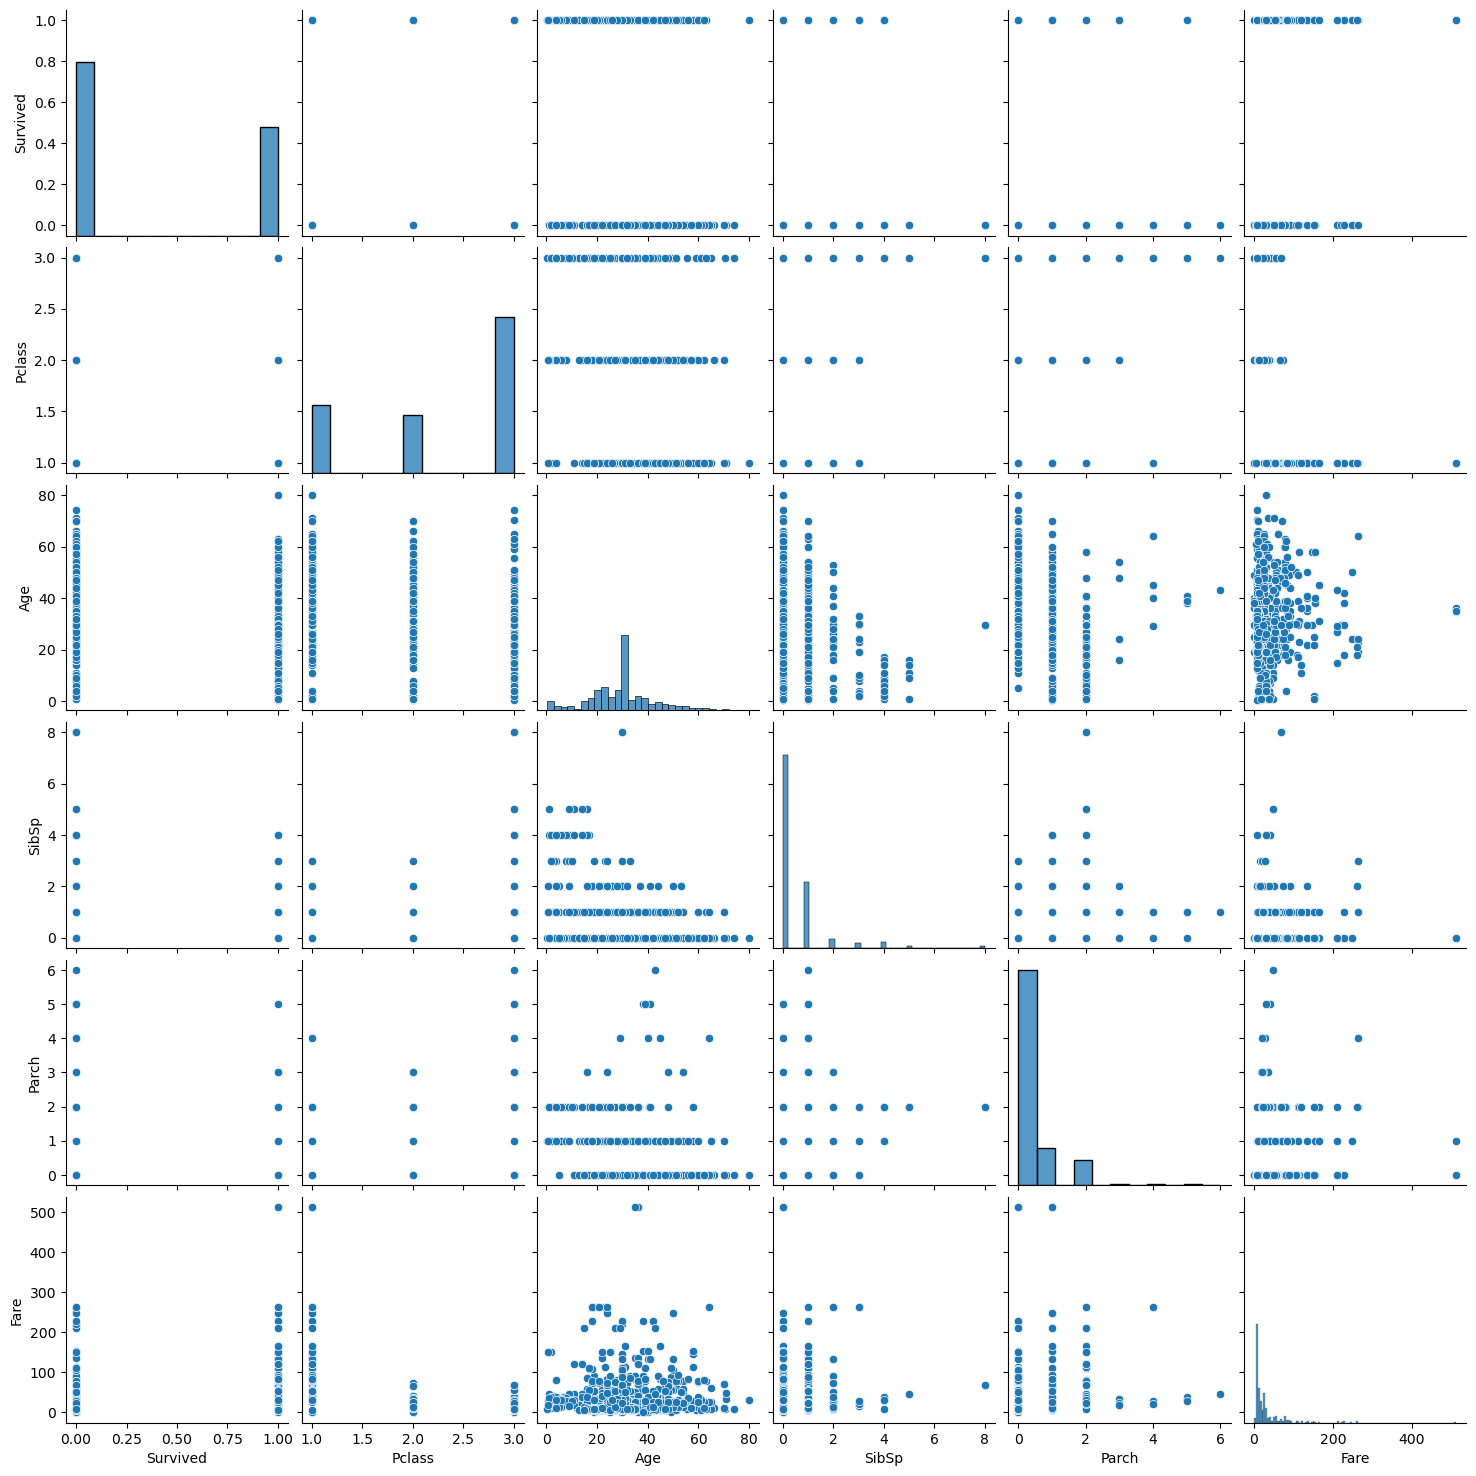

In [7]:
sns.pairplot(data=df)

# Data Encoding

In [8]:
le_Sex=LabelEncoder()
df['Sex']=le_Sex.fit_transform(df['Sex'])

le_Embarked=LabelEncoder()
df['Embarked']=le_Embarked.fit_transform(df['Embarked'])

In [9]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [10]:
y=df['Survived']
x=df.drop('Survived',axis=1)

In [11]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [12]:
std=StandardScaler()
df_scaled = std.fit_transform(x.to_numpy())
x = pd.DataFrame(df_scaled, columns=x.columns.values)

In [13]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.827377,0.737695,-0.592481,0.432793,-0.473674,-0.502445,0.585954
1,-1.566107,-1.355574,0.638789,0.432793,-0.473674,0.786845,-1.942303
2,0.827377,-1.355574,-0.284663,-0.474545,-0.473674,-0.488854,0.585954
3,-1.566107,-1.355574,0.407926,0.432793,-0.473674,0.420730,0.585954
4,0.827377,0.737695,0.407926,-0.474545,-0.473674,-0.486337,0.585954
...,...,...,...,...,...,...,...
886,-0.369365,0.737695,-0.207709,-0.474545,-0.473674,-0.386671,0.585954
887,-1.566107,-1.355574,-0.823344,-0.474545,-0.473674,-0.044381,0.585954
888,0.827377,-1.355574,0.000000,0.432793,2.008933,-0.176263,0.585954
889,-1.566107,0.737695,-0.284663,-0.474545,-0.473674,-0.044381,-1.942303


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [16]:
print(f'Size of x_train:{x_train.shape}')
print(f'Size of y_train:{y_train.shape}')
print(f'Size of x_val:{x_test.shape}')
print(f'Size of y_val:{y_test.shape}')

Size of x_train:(712, 7)
Size of y_train:(712,)
Size of x_val:(179, 7)
Size of y_val:(179,)


In [17]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [20]:
print(f'Training Accuracy Score: {rfc.score(x_train,y_train)*100}')
print(f'Testing Accuracy Score: {rfc.score(x_test,y_test)*100}')

Training Accuracy Score: 98.31460674157303
Testing Accuracy Score: 84.35754189944134


In [21]:
print('\nTraining Classification Report:\n')
print(classification_report(y_train,rfc.predict(x_train)))


Training Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       432
           1       0.98      0.97      0.98       280

    accuracy                           0.98       712
   macro avg       0.98      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712



In [24]:
print('\nValidation Classification Report:\n')
print(classification_report(y_test,rfc.predict(x_test)))


Validation Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       117
           1       0.76      0.81      0.78        62

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.85      0.84      0.84       179




 Training Confusion Matrix: 



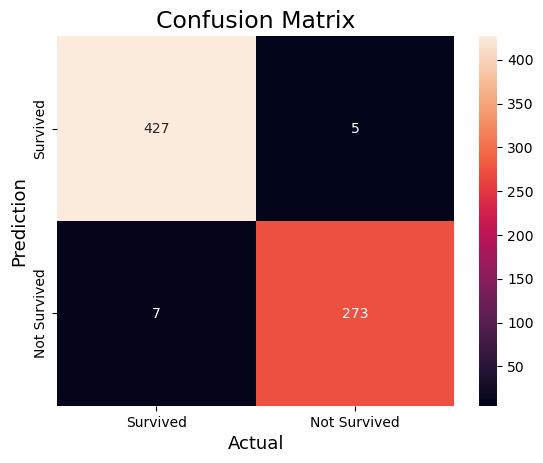

In [25]:
print('\n Training Confusion Matrix: \n')
cm=confusion_matrix(y_train,rfc.predict(x_train))

sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Survived','Not Survived'],
            yticklabels=['Survived','Not Survived'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


 Validation Confusion Matrix: 



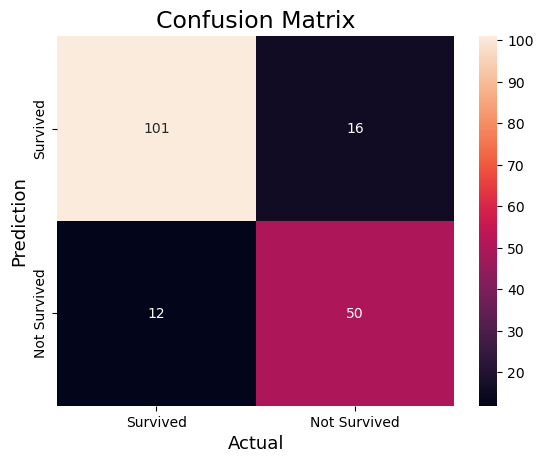

In [27]:
print('\n Validation Confusion Matrix: \n')
cm=confusion_matrix(y_test,rfc.predict(x_test))

sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Survived','Not Survived'],
            yticklabels=['Survived','Not Survived'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [28]:
test=pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [30]:
test['Sex']=le_Sex.transform(test['Sex'])
test['Embarked']=le_Embarked.transform(test['Embarked'])

In [31]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [32]:
test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [33]:
test['Age']=test['Age'].fillna(test['Age'].mean())
test['Fare']=test['Fare'].fillna(test['Fare'].mean())

In [34]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [35]:
df_test = std.transform(test.to_numpy())
test = pd.DataFrame(df_test, columns=test.columns.values)

In [36]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.827377,0.737695,0.369449,-0.474545,-0.473674,-0.490783,-0.678175
1,0.827377,-1.355574,1.331378,0.432793,-0.473674,-0.507479,0.585954
2,-0.369365,0.737695,2.485693,-0.474545,-0.473674,-0.453367,-0.678175
3,0.827377,0.737695,-0.207709,-0.474545,-0.473674,-0.474005,0.585954
4,0.827377,-1.355574,-0.592481,0.432793,0.767630,-0.401017,0.585954
...,...,...,...,...,...,...,...
413,0.827377,0.737695,0.044131,-0.474545,-0.473674,-0.486337,0.585954
414,-1.566107,-1.355574,0.715743,-0.474545,-0.473674,1.544246,-1.942303
415,0.827377,0.737695,0.677266,-0.474545,-0.473674,-0.502445,0.585954
416,0.827377,0.737695,0.044131,-0.474545,-0.473674,-0.486337,0.585954


In [39]:
y_pred=rfc.predict(test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [40]:
pred=pd.read_csv('gender_submission.csv')
pred['Survived']=y_pred

In [41]:
pred.to_csv('gender_submission.csv',index=False)